In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.python.keras.callbacks import TensorBoard

from time import time
from sklearn.model_selection import train_test_split

In [17]:
#df = pd.read_csv('family_height_galton.csv', sep=',') #Leemos el archivo con los datos
#df.drop(['index', 'children', 'family','childNum','midparentHeight'], axis='columns', inplace=True) #Elimino columnas
#df.gender.replace({'female':0,'male':1}, inplace = True) #Cambiamos 'gender' en valor binario (0,1)

#df.to_csv(r'db_family_height_galton.csv', index=False) #exportamos nuevo dataframe a CSV

       Hijas   Hijos 
Madre  0.323   0.305
Padre  0.392   0.428


[Text(0.5, 0, 'Altura Hijo (Cm)')]

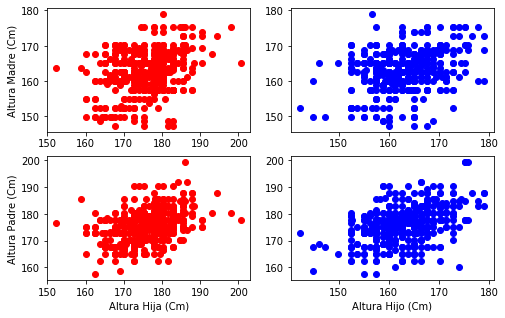

In [2]:
data = pd.read_csv('db_family_height_galton.csv') #Leemos el archivo con los datos

#sns.set_style('darkgrid')

#g = sns.pairplot(data, hue = 'gender', diag_kind='hist')
#for ax in g.axes.flat:
#    plt.setp(ax.get_xticklabels(),rotation=45)

hijas = data.loc[data['gender'] == 1]
hijos = data.loc[data['gender'] == 0]



madre_hija = np.corrcoef(hijas['childHeight'], hijas['mother'])[0, 1]
padre_hija = np.corrcoef(hijas['childHeight'], hijas['father'])[0, 1]
madre_hijo = np.corrcoef(hijos['childHeight'], hijos['mother'])[0, 1]
padre_hijo = np.corrcoef(hijos['childHeight'], hijos['father'])[0, 1]

print('       Hijas   Hijos \nMadre  ' 
      + str("{0:.3f}".format(madre_hija)) + '   ' + str("{0:.3f}".format(madre_hijo)) +
     '\nPadre  ' + str("{0:.3f}".format(padre_hija)) + '   ' + str("{0:.3f}".format(padre_hijo)))

fig, axs = plt.subplots(2, 2, figsize=(8, 5))
axs[0, 0].scatter(hijas['childHeight'] / 0.393701, hijas['mother'] / 0.393701, c='r')
axs[0, 0].set(ylabel='Altura Madre (Cm)')
axs[0, 1].scatter(hijos['childHeight'] / 0.393701, hijos['mother'] / 0.393701, c='b')
axs[1, 0].scatter(hijas['childHeight'] / 0.393701, hijas['father'] / 0.393701, c='r')
axs[1, 0].set(ylabel='Altura Padre (Cm)')
axs[1, 0].set(xlabel='Altura Hija (Cm)')
axs[1, 1].scatter(hijos['childHeight'] / 0.393701, hijos['father'] / 0.393701, c='b')
axs[1, 1].set(xlabel='Altura Hijo (Cm)')




In [126]:
X = data.loc[:, 'father':'gender']
y = data.loc[:,'childHeight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #Dividimos los datos

print(data.head(2))

   father  mother  gender  childHeight
0    78.5    67.0       1         73.2
1    78.5    67.0       0         69.2


In [129]:
model = keras.Sequential([
    keras.layers.Dense(10, activation = 'relu', input_shape = (3,)),
    keras.layers.Dense(5, activation = 'relu'),
    keras.layers.Dense(1)
])

#ADAM =  keras.optimizers.ADAM(lr = 0.001)
model.compile(optimizer='Adam', loss = 'mean_squared_error')

In [136]:
tensorboard = TensorBoard(log_dir="logs\{}".format(time()))

model.fit(X_train, y_train, epochs = 400, verbose = 0, callbacks = [tensorboard])
model.evaluate(X, y, batch_size=10)

934/934 [==============================] - 0s 170us/sample - loss: 4.8185


4.818458820691201

In [137]:
Padre = 168
Madre = 170
Sexo = 1

test_data = np.array([Padre * 0.393701, Madre * 0.393701, Sexo])
print(str((int((model.predict(test_data.reshape(1,3), batch_size = 1)) / 0.393701) / 100)) + " Mts")

1.74 Mts


In [138]:
model.save('model_predict_height_from_parent_keras.h5')